In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
import pandas as pd
import random

In [3]:
import shutil

In [4]:
path = Path('data/shoedog')

## Creating dataset

In [ ]:
# shutil.rmtree(path)

In [ ]:
brands = ['nike', 'asics', 'adidas', 'new_balance']
for brand in brands:
    dest = path/brand
    dest.mkdir(parents=True, exist_ok=True)

In [ ]:
path.ls()

In [ ]:
for brand in brands:
    dest = path/brand
    file = f"{brand}.csv"
    download_images(path/file, dest, max_pics=200)

In [ ]:
(path/'nike').ls()

## Training

In [5]:
np.random.seed(42)
random.seed(43)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [6]:
data.classes

['adidas', 'asics', 'new_balance', 'nike']

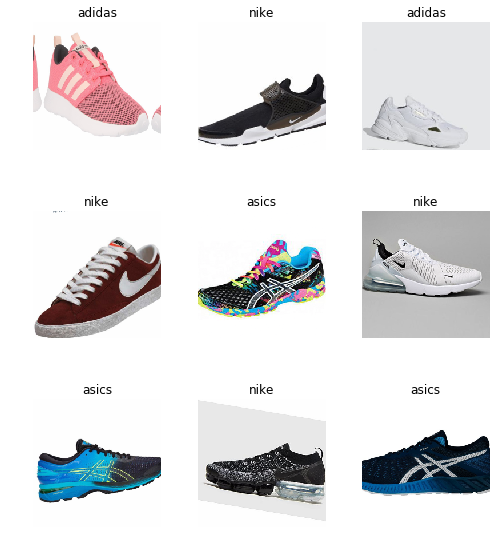

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['adidas', 'asics', 'new_balance', 'nike'], 4, 608, 151)

In [9]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.615212,1.321810,0.569536
2,1.282110,1.024027,0.344371
3,1.096817,0.940768,0.337748
4,0.961481,0.936719,0.304636


In [ ]:
learn.save('stage-1')

In [ ]:
learn.load('stage-1')

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
?learn.fit_one_cycle

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(1e-4, 1e-3))

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(1e-4, 1e-3))

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(1e-4, 1e-3))

In [ ]:
learn.save('stage-2')

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.load('stage-2')

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(8*1e-5, 1e-4))

In [ ]:
learn.save('stage-3');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(9)

In [ ]:
from fastai.widgets import *

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [ ]:
ImageCleaner(ds, idxs, path)


now with cleaned dataset

In [ ]:
?ImageDataBunch.from_csv

In [ ]:
import random

In [ ]:
random.seed(42)
np.random.seed(42)
data = ImageDataBunch.from_csv(path, csv_labels="cleaned.csv", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('2-stage-1')

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.load('2-stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(5*1e-5, 1e-3))

In [ ]:
learn.save('2-stage-2')

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(5*1e-5, 5*1e-4))

In [ ]:
learn.save('2-stage-3')

In [ ]:
learn.load('2-stage-3')

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(3*1e-5,1e-4))

In [ ]:
learn.save('2-stage-4')

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(3*1e-5,1e-4))

In [ ]:
learn.fit_one_cycle(10, max_lr=1e-5)

# ResNet50

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, csv_labels="cleaned.csv", valid_pct=0.2,
        ds_tfms=get_transforms(), size=299, num_workers=4).normalize(imagenet_stats)

In [ ]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(6)

In [ ]:
learn.save('resnet50-stage-1')

In [ ]:
learn.load('resnet50-stage-1');

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle??

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(8e-5, 3e-4))

In [ ]:
learn.save('resnet50-stage-2')

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(8e-5, 3e-4))

In [ ]:
learn.save('resnet50-stage-3')

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(1e-5, 1e-4))

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(1e-5, 1e-4))

In [ ]:
learn.save('resnet50-stage-4')

In [ ]:
learn.load('resnet50-stage-4')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=1e-5)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(15)

In [ ]:
get_transforms?

In [ ]:
interp.plot_confusion_matrix()